# Philippine Poverty Statistics - Data Preparation & EDA
This notebook contains all code for data preparation of the dataset. EDA is split between the code here and data visualizations done in Tableau.

# Data Preparation

### Reading Input

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
input_df = pd.read_csv('povstat_processed.csv')

# Copy of df for all processing and analysis, original input_df kept as backup
df = input_df.copy() 
df

,Unnamed: 0,Variable,Year,province,value,adm_level,region,unit
0,0,Annual Per Capita Poverty Threshold (in Pesos),1991,1st District,NaN,District,NCR,in Pesos
1,1,Annual Per Capita Poverty Threshold (in Pesos),2006,1st District,"15,699",District,NCR,in Pesos
2,2,Annual Per Capita Poverty Threshold (in Pesos),2009,1st District,"19,227",District,NCR,in Pesos
3,3,Annual Per Capita Poverty Threshold (in Pesos),2012,1st District,"20,344",District,NCR,in Pesos
4,4,Annual Per Capita Poverty Threshold (in Pesos),2015,1st District,"25,007",District,NCR,in Pesos
...,...,...,...,...,...,...,...,...
3600,3600,Magnitude of Subsistence Poor Population,1991,Zamboanga del Sur,NaN,Province,Region IX,population
3601,3601,Magnitude of Subsistence Poor Population,2006,Zamboanga del Sur,"268,576",Province,Region IX,population
3602,3602,Magnitude of Subsistence Poor Population,2009,Zamboanga del Sur,"261,992",Province,Region IX,population
3603,3603,Magnitude of Subsistence Poor Population,2012,Zamboanga del Sur,"209,765",Province,Region IX,population


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3605 entries, 0 to 3604
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3605 non-null   int64 
 1   Variable    3605 non-null   object
 2   Year        3605 non-null   int64 
 3   province    3605 non-null   object
 4   value       3010 non-null   object
 5   adm_level   3360 non-null   object
 6   region      3360 non-null   object
 7   unit        3605 non-null   object
dtypes: int64(2), object(6)
memory usage: 225.4+ KB


### Cleanup
Before further data preparation, I first drop the unneeded index column and rename columns for consistency.

In [4]:
# Drop first column (index) as Pandas dataframe already adds index
df.drop(columns=df.columns[[0]], axis=1, inplace=True)

In [5]:
# Rename columns
df.rename(columns = {
    'Variable': 'Variable',
    'Year': 'Year',
    'province': 'Province',
    'value': 'Value',
    'adm_level': 'Admin_Lvl',
    'region': 'Region',
    'unit': 'Unit'
}, inplace=True)

### Inspect unique values
To get a general grasp of the dataset, I then inspect the unique values of each column. This helps give a grasp of:
- How diverse the values are per column
- The datatype of each column
- Missing values (if any)

In [6]:
# Print counts of unique values per column
print("Unique value counts per column:")
df.nunique()

Unique value counts per column:


Variable        7
Year            5
Province      103
Value        2168
Admin_Lvl       4
Region         18
Unit            4
dtype: int64

In [7]:
# List unique values per column
unique_vars = df['Variable'].unique().tolist()
unique_years = df['Year'].unique().tolist()
unique_admins = df['Admin_Lvl'].unique().tolist()
unique_regions = df['Region'].unique().tolist()
unique_units = df['Unit'].unique().tolist()

In [8]:
print("Unique values in Variable:")
print("\n".join(map(str, unique_vars)))

Unique values in Variable:
Annual Per Capita Poverty Threshold (in Pesos)
Poverty Incidence among Families (%)
Magnitude of Poor Families
Poverty Incidence among Population (%)
Magnitude of Poor Population
Subsistence Incidence among Population (%)
Magnitude of Subsistence Poor Population


In [9]:
print("Unique values in Year:")
print("\n".join(map(str, unique_years)))

Unique values in Year:
1991
2006
2009
2012
2015


In [10]:
print("Unique values in Admin_Lvl:")
print("\n".join(map(str, unique_admins)))

Unique values in Admin_Lvl:
District
Region
Province
nan
Country


In [11]:
print("Unique values in Region:")
print("\n".join(map(str, unique_regions)))

Unique values in Region:
NCR
ARMM
CAR
CARAGA
Region VI
Region V
nan
Region III
Region VI-A
Region VIII
Region VII
Region X
Region II
Region XI
Region I
Region IV-B
Region XII
Philippines
Region IX


In [12]:
print("Unique values in Unit:")
print("\n".join(map(str, unique_units)))

Unique values in Unit:
in Pesos
%
families
population


From the listed unique values, the ```Value``` and ```Year``` columns appear to be numerical data, while all other columns are categorical data.

### Cast columns to relevant datatypes
Each column is then cast to their respective datatypes. Only ```Value``` needs to be prepared for type conversion, which is done as below.

In [13]:
# Inspect which entries under 'Value' may cause trouble with type conversion
faulty_values = df[pd.to_numeric(df['Value'], errors='coerce').isnull()]['Value'].unique()

print(f"{len(faulty_values)} faulty values returned:")
list(faulty_values)[:5] # Only 5 shown in this notebook for brevity

1671 faulty values returned:


[nan, '  15,699 ', '  19,227 ', '  20,344 ', '  25,007 ']

In [14]:
# Apply adjustments to entries under 'Value' to prepare for type conversion
df['Value'] = df['Value'].str.strip()
df['Value'] = df['Value'].str.replace(",", "")
df['Value'] = df['Value'].replace("-", np.NaN)

In [15]:
# Convert datatypes of all columns into more relevant ones
df = df.astype({
    'Variable': 'category',
    'Year': 'int64',
    'Province': 'category',
    'Value': 'float64',
    'Admin_Lvl': 'category',
    'Region': 'category',
    'Unit': 'category'
})

# Inspect new datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3605 entries, 0 to 3604
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Variable   3605 non-null   category
 1   Year       3605 non-null   int64   
 2   Province   3605 non-null   category
 3   Value      3008 non-null   float64 
 4   Admin_Lvl  3360 non-null   category
 5   Region     3360 non-null   category
 6   Unit       3605 non-null   category
dtypes: category(5), float64(1), int64(1)
memory usage: 80.4 KB


### Plot data distribution
To get a visual sense for the data, I plot the distribution and diversity of data points through countplots.

In [16]:
# Abbreviations for x tick labels
vars_labels = ['APT', 'PI(F)', 'MPF', 'PI(P)', 'MPP', 'SI', 'MSP']
year_labels = unique_years
prov_labels = []
admin_labels = ['District', 'Region', 'Province', 'Country']
region_labels = ['NCR', 'ARMM', 'CAR', '13', 'PH', '5', '3', '4A', '8', '7', '10', '2', '11', '1', '4B', '12', '6', '9']
unit_labels = unique_units

xticklabels = [vars_labels, year_labels, prov_labels, admin_labels, region_labels, unit_labels]

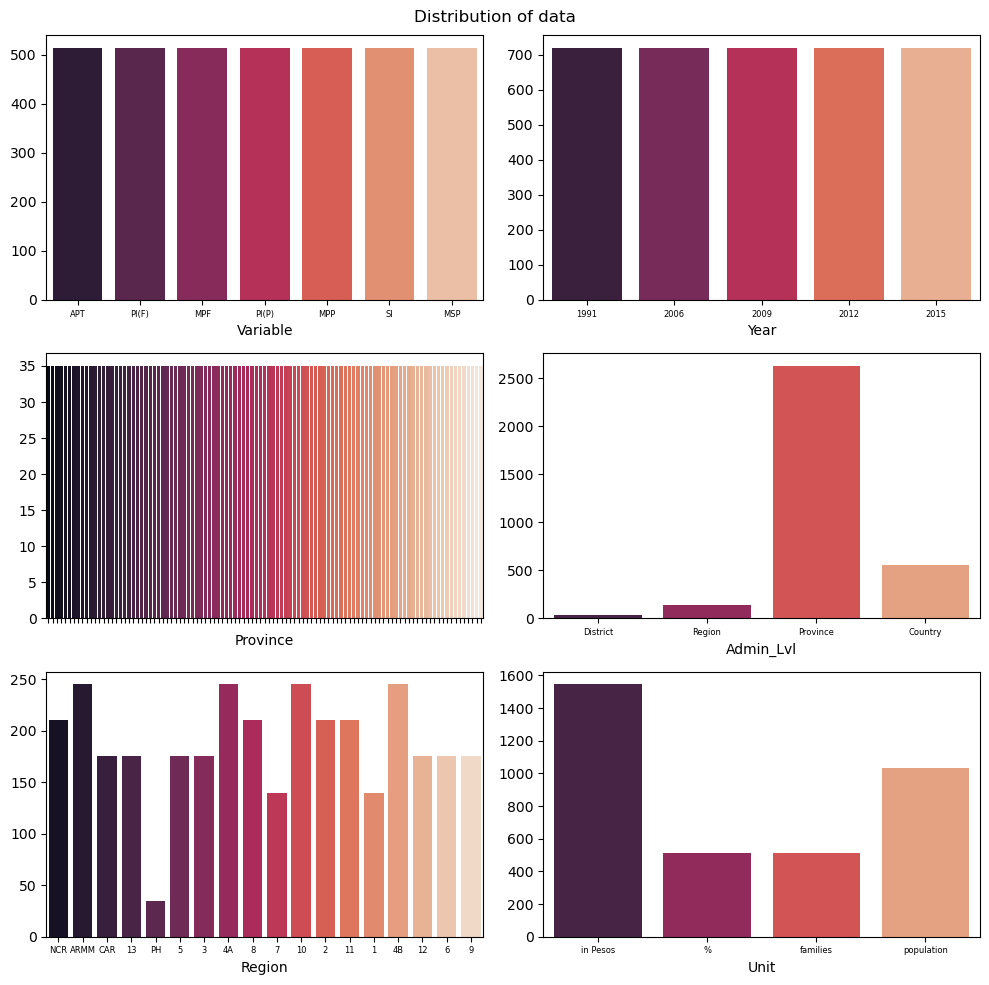

In [17]:
# Show general distribution of data

# Get list of columns to iterate over
cols = list(df.columns)
cols.remove('Value')


# PLot distribution
plt.figure(figsize = (10, 10))
plt.suptitle("Distribution of data")

for i in range(len(cols)):
    ax = plt.subplot(3, 2, i+1)
    sns.countplot(data=df, x=cols[i], palette='rocket')
    ax.set_ylabel('')
    ax.set_xticklabels(xticklabels[i], fontsize=6)

plt.tight_layout()
plt.show()

### Inspect missing values
Missing values are then inspected to investigate:
- Are there any patterns to the missing data?
- Are the missing data in the same format?
- How prevalent is the missing data, and in which columns?
- How should the missing data be acted upon? Should it be excluded from analysis or does it enrich analysis?
- Would the missing data still contribute to developing a better picture of poverty?

Since the unique values listed earlier already show that the missing values are already in a Pandas-readable format (i.e. ```NaN``` instead of ```"N/A"```, ```"No"```, etc.), the next step is to inspect missing values across the whole dataset.

In [18]:
# Show total of missing values per column 
missing_count = df.isna().sum()
missing_percent = (df.isna().sum()/df.isna().count())

pd.concat([missing_count, missing_percent], 
          axis=1, 
          keys=['Count of missing values', 'Percent of total'])

,Count of missing values,Percent of total
Variable,0,0.000000
Year,0,0.000000
Province,0,0.000000
Value,597,0.165603
Admin_Lvl,245,0.067961
Region,245,0.067961
Unit,0,0.000000


### Inspect missing values: ```Admin_Lvl``` & ```Region```

Given the same amount of missing values, I first test whether missing ```Admin_Lvl``` & ```Region``` may be from the same rows (i.e. whatever is missing ```Admin_Lvl``` is also be missing ```Region``` data). This hypothesis can be tested with a simple comparison check below.

In [19]:
# Investigate missing Admin_Lvl & Region values

# Extract rows with missing Admin_Lvl
missing_admin = df[df['Admin_Lvl'].isna()]
# Extract rows with missing Region
missing_region = df[df['Region'].isna()]

print("Are rows with missing Admin_Lvl rows the same as the rows with missing Region values (and vice versa)?")
print(missing_admin.equals(missing_region))

Are rows with missing Admin_Lvl rows the same as the rows with missing Region values (and vice versa)?
True


In [20]:
# Inspect provinces with missing Admin_Lvl and Region values

# Get province occurrences with missing Admin_Lvl and Region values
missing_province_counts = missing_admin['Province'].value_counts()
missing_provinces = missing_province_counts[missing_province_counts > 0]

# Get overall counts of those provinces from the overall dataset
province_counts = df['Province'].value_counts()
province_counts = province_counts[missing_provinces.index]

missing_provinces_percent = (missing_provinces/province_counts)


pd.concat([missing_provinces, missing_provinces_percent], 
          axis=1, 
          keys=['Count of missing values', 'Percent of total'])

,Count of missing values,Percent of total
Camiguin,35,1.0
"Cotabato City,",35,1.0
"Isabela City,",35,1.0
"Guimaras,",35,1.0
Aurora,35,1.0
"Siquijor,",35,1.0
Batanes,35,1.0


From the table above, all data points for these provinces are missing ```Admin_Lvl``` and ```Region``` data, which will later be addressed. There are also minor typographical errors with extra commas that can be fixed.

In [21]:
# Rename provinces with extra commas
df = df.replace('Cotabato City,', 'Cotabato City')
df = df.replace('Isabela City,', 'Isabela City')
df = df.replace('Guimaras,', 'Guimaras')
df = df.replace('Siquijor,', 'Siquijor')

# Show a few sample rows to demonstrate changes
df.loc[df['Province'] == 'Siquijor'][:2]

,Variable,Year,Province,Value,Admin_Lvl,Region,Unit
3080,Annual Per Capita Poverty Threshold (in Pesos),1991,Siquijor,NaN,NaN,NaN,in Pesos
3081,Annual Per Capita Poverty Threshold (in Pesos),2006,Siquijor,13971.0,NaN,NaN,in Pesos


Based on the type of missing data, ```Admin_Lvl``` and ```Region``` can still be filled in with accuracy based on  ```Province```. Hence, the missing data is filled below.

In [22]:
# Manually resolve missing Admin_Lvl and Region values based on province

provinces = ['Camiguin', 'Cotabato City', 'Isabela City', 'Guimaras', 'Aurora', 'Siquijor', 'Batanes']
regions = ['Region X', 'Region XII', 'Region IX', 'Region VI', 'Region III', 'Region VII', 'Region II']

for index, province in enumerate(provinces):
    df.loc[df['Province'] == province, 'Admin_Lvl'] = 'Province'
    df.loc[df['Province'] == province, 'Region'] = regions[index]

# Show a few sample rows to demonstrate changes
df.loc[df['Province'].isin(provinces)]

,Variable,Year,Province,Value,Admin_Lvl,Region,Unit
420,Annual Per Capita Poverty Threshold (in Pesos),1991,Aurora,NaN,Province,Region III,in Pesos
421,Annual Per Capita Poverty Threshold (in Pesos),2006,Aurora,11883.0,Province,Region III,in Pesos
422,Annual Per Capita Poverty Threshold (in Pesos),2009,Aurora,14979.0,Province,Region III,in Pesos
423,Annual Per Capita Poverty Threshold (in Pesos),2012,Aurora,18466.0,Province,Region III,in Pesos
424,Annual Per Capita Poverty Threshold (in Pesos),2015,Aurora,20458.0,Province,Region III,in Pesos
...,...,...,...,...,...,...,...
3110,Magnitude of Subsistence Poor Population,1991,Siquijor,NaN,Province,Region VII,population
3111,Magnitude of Subsistence Poor Population,2006,Siquijor,15473.0,Province,Region VII,population
3112,Magnitude of Subsistence Poor Population,2009,Siquijor,4795.0,Province,Region VII,population
3113,Magnitude of Subsistence Poor Population,2012,Siquijor,11084.0,Province,Region VII,population


In [23]:
# Check if all missing Admin_Lvl & Region values have been addressed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3605 entries, 0 to 3604
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Variable   3605 non-null   category
 1   Year       3605 non-null   int64   
 2   Province   3605 non-null   category
 3   Value      3008 non-null   float64 
 4   Admin_Lvl  3605 non-null   category
 5   Region     3605 non-null   category
 6   Unit       3605 non-null   category
dtypes: category(5), float64(1), int64(1)
memory usage: 80.4 KB


There are now 3605/3605 non-null values for ```Admin_Lvl``` & ```Region```, so all missing values under these have been resolved.

### Inspect missing values: ```Value```
Next, any possible patterns for missing data under ```Value``` are investigated.

In [24]:
# Extract rows with missing data under "Value"
missing_values = df[df['Value'].isna()]
missing_values

,Variable,Year,Province,Value,Admin_Lvl,Region,Unit
0,Annual Per Capita Poverty Threshold (in Pesos),1991,1st District,NaN,District,NCR,in Pesos
5,Poverty Incidence among Families (%),1991,1st District,NaN,District,NCR,%
10,Magnitude of Poor Families,1991,1st District,NaN,District,NCR,families
15,Poverty Incidence among Population (%),1991,1st District,NaN,District,NCR,%
20,Magnitude of Poor Population,1991,1st District,NaN,District,NCR,population
...,...,...,...,...,...,...,...
3580,Magnitude of Poor Families,1991,Zamboanga del Sur,NaN,Province,Region IX,families
3585,Poverty Incidence among Population (%),1991,Zamboanga del Sur,NaN,Province,Region IX,%
3590,Magnitude of Poor Population,1991,Zamboanga del Sur,NaN,Province,Region IX,population
3595,Subsistence Incidence among Population (%),1991,Zamboanga del Sur,NaN,Province,Region IX,%


In [25]:
# Inspect unique value counts
print("Unique value counts for rows that have missing values:")
missing_values.nunique()

Unique value counts for rows that have missing values:


Variable      7
Year          2
Province     85
Value         0
Admin_Lvl     2
Region       17
Unit          4
dtype: int64

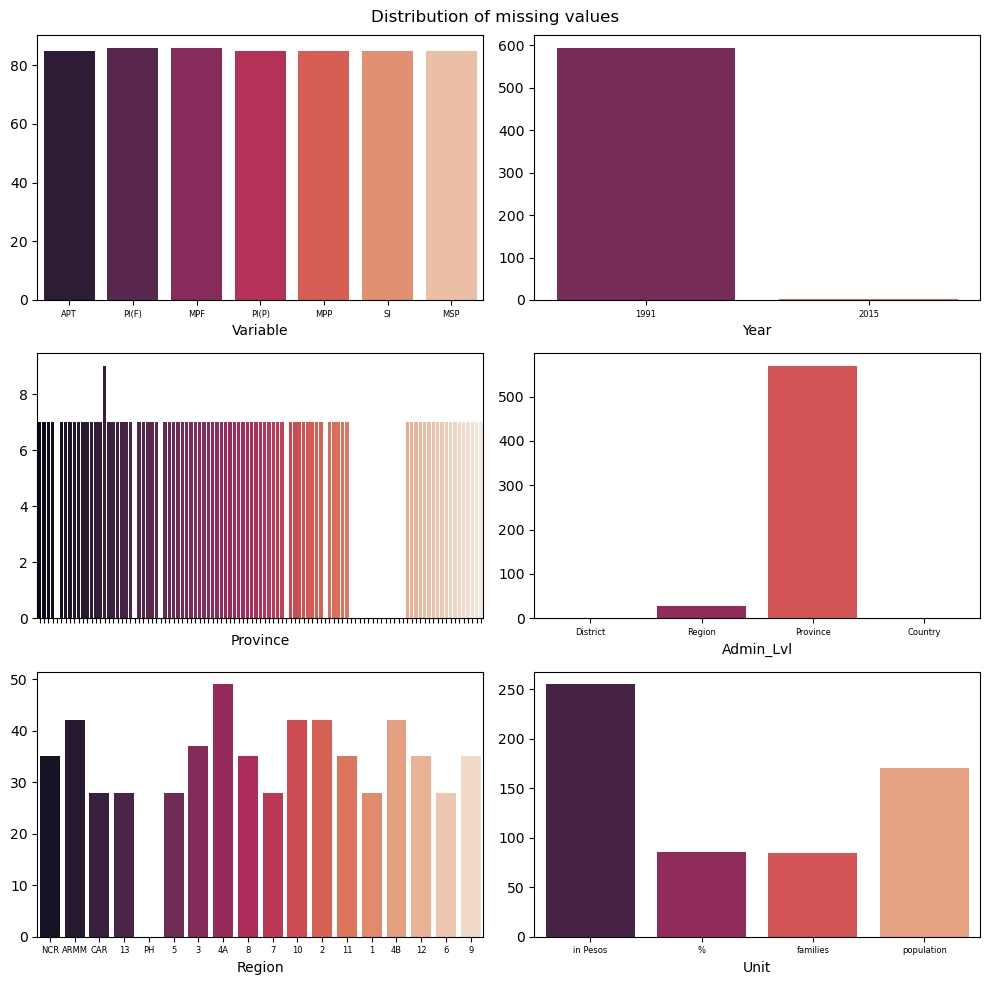

In [26]:
# Get list of other columns to iterate over
cols = list(df.columns)
cols.remove('Value')

# PLot distribution of missing values
plt.figure(figsize = (10, 10))
plt.suptitle("Distribution of missing values")

# Abbreviations for x tick labels
xticklabels = [vars_labels, [1991, 2015], prov_labels, admin_labels, region_labels, unit_labels]

for i in range(len(cols)):
    ax = plt.subplot(3, 2, i+1)
    sns.countplot(data=missing_values, x=cols[i], palette='rocket')
    ax.set_ylabel('')
    ax.set_xticklabels(xticklabels[i], fontsize=6)

plt.tight_layout()
plt.show()

The two figures above raise the following observations:
- Missing values are overall equally spaced out by ```Variable```, ```Province```, and ```Region```
- There are only 2 ```Year```s with missing data, with nearly all concentrated in a single year
- Similarly, there are only 2 ```Admin_Lvl```s with missing data, with nearly all concentrated in a single level

From the 2nd point, the next step could be to investigate the missing data by year.

In [27]:
# Print exact number of missing values by year
print("Count of missing entries under 'Value' by year")
missing_by_year = missing_values.groupby(by="Year")
missing_by_year.size()

Count of missing entries under 'Value' by year


Year
1991    595
2015      2
dtype: int64

A very small amount of missing values appear to be under 2015, with the rest being under 1991. These are further investigated below:

In [28]:
# Query missing 2015 data
missing_2015 = missing_values.query('Year == 2015')
missing_2015

,Variable,Year,Province,Value,Admin_Lvl,Region,Unit
539,Magnitude of Poor Families,2015,Batanes,NaN,Province,Region II,families
549,Magnitude of Poor Population,2015,Batanes,NaN,Province,Region II,population


In [29]:
# Inspect what % of 1991 data is unavailable
missing_1991_cnt = len(missing_values.query('Year == 1991'))
total_1991_cnt = len(df.query('Year == 1991'))

print(f"{missing_1991_cnt*100/total_1991_cnt}% of 1991 data is missing ({missing_1991_cnt}/{total_1991_cnt} rows)")

82.52427184466019% of 1991 data is missing (595/721 rows)


As majority of 1991 data is missing, it could simply be omitted from analysis. However, before dropping it, it may be preferable to look at the 1991 data and if it differs from the other years, especially given its great time gap to the other years. 

In [30]:
data_1991 = df.query('Year == 1991')
data_1991

,Variable,Year,Province,Value,Admin_Lvl,Region,Unit
0,Annual Per Capita Poverty Threshold (in Pesos),1991,1st District,NaN,District,NCR,in Pesos
5,Poverty Incidence among Families (%),1991,1st District,NaN,District,NCR,%
10,Magnitude of Poor Families,1991,1st District,NaN,District,NCR,families
15,Poverty Incidence among Population (%),1991,1st District,NaN,District,NCR,%
20,Magnitude of Poor Population,1991,1st District,NaN,District,NCR,population
...,...,...,...,...,...,...,...
3580,Magnitude of Poor Families,1991,Zamboanga del Sur,NaN,Province,Region IX,families
3585,Poverty Incidence among Population (%),1991,Zamboanga del Sur,NaN,Province,Region IX,%
3590,Magnitude of Poor Population,1991,Zamboanga del Sur,NaN,Province,Region IX,population
3595,Subsistence Incidence among Population (%),1991,Zamboanga del Sur,NaN,Province,Region IX,%


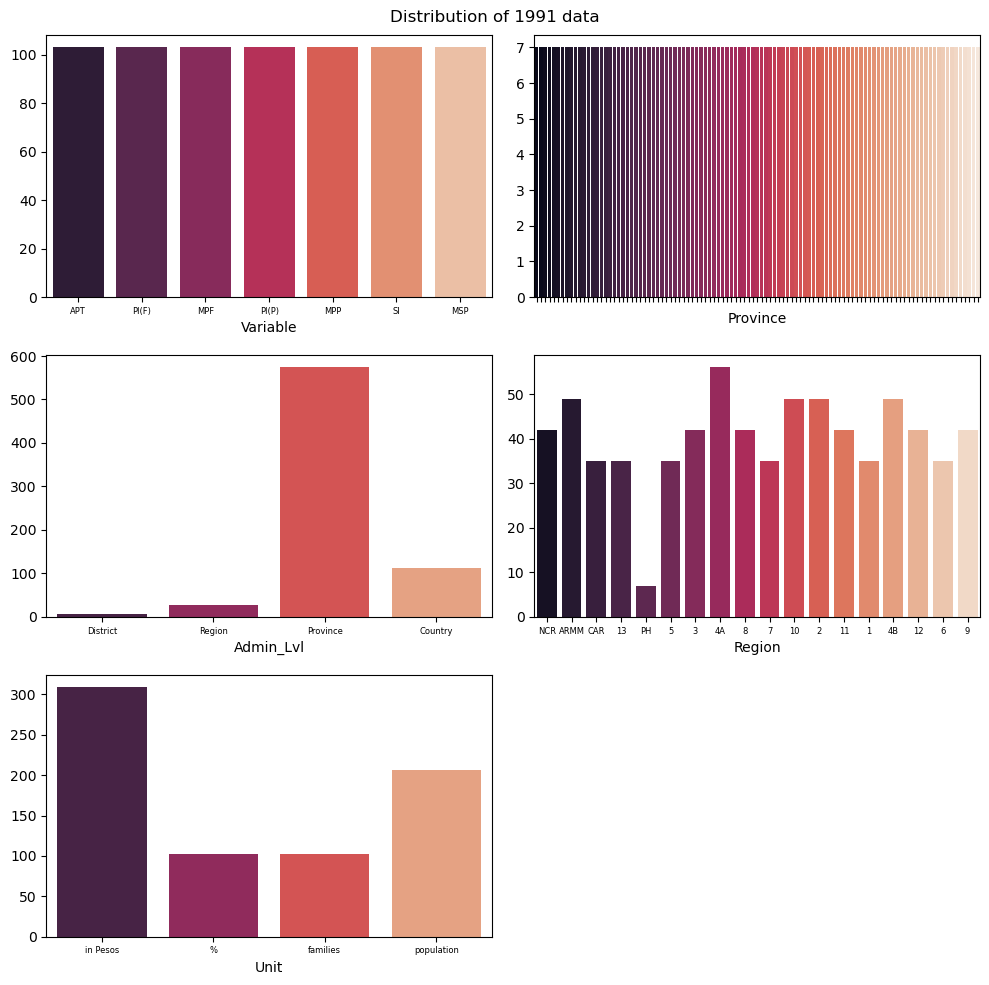

In [31]:
# Get list of other columns to iterate over
cols = list(df.columns)
cols.remove('Value')
cols.remove('Year')

# PLot distribution
plt.figure(figsize = (10, 10))
plt.suptitle("Distribution of 1991 data")

# Abbreviations for x tick labels
xticklabels = [vars_labels, prov_labels, admin_labels, region_labels, unit_labels]

for i in range(len(cols)):
    ax = plt.subplot(3, 2, i+1)
    sns.countplot(data=data_1991, x=cols[i], palette='rocket')
    ax.set_ylabel('')
    ax.set_xticklabels(xticklabels[i], fontsize=6)

plt.tight_layout()
plt.show()

Given the distribution of 1991 data, it may be best to keep it in the dataset but treat it differently from the other years where possible.

### Correct mislabelled data: Change ```Admin_Lvl``` for Region II
Lastly, there appear to be several rows with incorrectly labelled ```Admin_Lvl```. This is inspected and corrected below.

In [32]:
unique_districts = list(df.query('Admin_Lvl == "District"')['Province'].unique())
unique_provinces = list(df.query('Admin_Lvl == "Province"')['Province'].unique())
unique_regions = list(df.query('Admin_Lvl == "Region"')['Province'].unique())
unique_countries = list(df.query('Admin_Lvl == "Country"')['Province'].unique())

print("Unique Places under District:", unique_districts)

Unique Places under District: ['1st District', '2nd District', '3rd District', '4th District']


In [33]:
print("Unique Places under Province:", unique_provinces)

Unique Places under Province: ['Abra', 'Agusan del Norte', 'Agusan del Sur', 'Aklan', 'Albay', 'Antique', 'Apayao', 'Aurora', 'Basilan', 'Bataan', 'Batanes', 'Batangas', 'Benguet', 'Biliran', 'Bohol', 'Bukidnon', 'Bulacan', 'Cagayan', 'Camarines Norte', 'Camarines Sur', 'Camiguin', 'Capiz', 'Catanduanes', 'Cavite', 'Cebu', 'Compostela Valley', 'Cotabato City', 'Davao Oriental', 'Davao del Norte', 'Davao del Sur', 'Eastern Samar', 'Guimaras', 'Ifugao', 'Ilocos Norte', 'Ilocos Sur', 'Iloilo', 'Isabela', 'Isabela City', 'Kalinga', 'La Union', 'Laguna', 'Lanao del Norte', 'Lanao del Sur', 'Leyte', 'Maguindanao', 'Marinduque', 'Masbate', 'Misamis Occidental', 'Misamis Oriental', 'Mt. Province', 'Negros Occidental', 'Negros Oriental', 'North Cotabato', 'Northern Samar', 'Nueva Ecija', 'Nueva Vizcaya', 'Occidental Mindoro', 'Oriental Mindoro', 'Palawan', 'Pampanga', 'Pangasinan', 'Quezon', 'Quirino', 'Region II', 'Rizal', 'Romblon', 'Saranggani', 'Siquijor', 'Sorsogon', 'South Cotabato', 'Sou

Region II appears as a province above, which is incorrect. These rows will be corrected later.

In [34]:
print("Unique Places under Region:", unique_regions)

Unique Places under Region: ['ARMM', 'CAR', 'Caraga', 'NCR', 'Region I', 'Region III', 'Region IV-A', 'Region IV-B', 'Region IX', 'Region V', 'Region VI', 'Region VII', 'Region VIII', 'Region X', 'Region XI', 'Region XII']


In [35]:
print("Unique Places under Country:", unique_countries)

Unique Places under Country: ['PHILIPPINES']


To correct the mislabelled rows, rows with Region II under ```Province``` are queried and changed from ```Admin_Lvl = Province``` to  ```Admin_Lvl = Region```.

In [36]:
# Query mislabelled rows
mislabelled = df.query('Province == "Region II" and Admin_Lvl == "Province"')
mislabelled

,Variable,Year,Province,Value,Admin_Lvl,Region,Unit
2555,Annual Per Capita Poverty Threshold (in Pesos),1991,Region II,6525.0,Province,Region II,in Pesos
2556,Annual Per Capita Poverty Threshold (in Pesos),2006,Region II,13944.0,Province,Region II,in Pesos
2557,Annual Per Capita Poverty Threshold (in Pesos),2009,Region II,17330.0,Province,Region II,in Pesos
2558,Annual Per Capita Poverty Threshold (in Pesos),2012,Region II,19125.0,Province,Region II,in Pesos
2559,Annual Per Capita Poverty Threshold (in Pesos),2015,Region II,21860.0,Province,Region II,in Pesos
2560,Poverty Incidence among Families (%),1991,Region II,37.3,Province,Region II,%
2561,Poverty Incidence among Families (%),2006,Region II,21.7,Province,Region II,%
2562,Poverty Incidence among Families (%),2009,Region II,20.2,Province,Region II,%
2563,Poverty Incidence among Families (%),2012,Region II,17.0,Province,Region II,%
2564,Poverty Incidence among Families (%),2015,Region II,11.7,Province,Region II,%


In [37]:
# Correct mislabelled rows
df.loc[mislabelled.index, 'Admin_Lvl'] = 'Region'
df.loc[mislabelled.index]

,Variable,Year,Province,Value,Admin_Lvl,Region,Unit
2555,Annual Per Capita Poverty Threshold (in Pesos),1991,Region II,6525.0,Region,Region II,in Pesos
2556,Annual Per Capita Poverty Threshold (in Pesos),2006,Region II,13944.0,Region,Region II,in Pesos
2557,Annual Per Capita Poverty Threshold (in Pesos),2009,Region II,17330.0,Region,Region II,in Pesos
2558,Annual Per Capita Poverty Threshold (in Pesos),2012,Region II,19125.0,Region,Region II,in Pesos
2559,Annual Per Capita Poverty Threshold (in Pesos),2015,Region II,21860.0,Region,Region II,in Pesos
2560,Poverty Incidence among Families (%),1991,Region II,37.3,Region,Region II,%
2561,Poverty Incidence among Families (%),2006,Region II,21.7,Region,Region II,%
2562,Poverty Incidence among Families (%),2009,Region II,20.2,Region,Region II,%
2563,Poverty Incidence among Families (%),2012,Region II,17.0,Region,Region II,%
2564,Poverty Incidence among Families (%),2015,Region II,11.7,Region,Region II,%


### Correct mislabelled data: Change Region VI-A to Region IV-A
There also appears to be a typo wherein Region IV-A is spelled as Region VI-A, which is corrected as follows.

In [38]:
# Check for mislabelled rows
df.query('Region == "Region VI-A"')

,Variable,Year,Province,Value,Admin_Lvl,Region,Unit
560,Annual Per Capita Poverty Threshold (in Pesos),1991,Batangas,NaN,Province,Region VI-A,in Pesos
561,Annual Per Capita Poverty Threshold (in Pesos),2006,Batangas,13735.0,Province,Region VI-A,in Pesos
562,Annual Per Capita Poverty Threshold (in Pesos),2009,Batangas,17360.0,Province,Region VI-A,in Pesos
563,Annual Per Capita Poverty Threshold (in Pesos),2012,Batangas,19437.0,Province,Region VI-A,in Pesos
564,Annual Per Capita Poverty Threshold (in Pesos),2015,Batangas,21767.0,Province,Region VI-A,in Pesos
...,...,...,...,...,...,...,...
3005,Magnitude of Subsistence Poor Population,1991,Rizal,NaN,Province,Region VI-A,population
3006,Magnitude of Subsistence Poor Population,2006,Rizal,28685.0,Province,Region VI-A,population
3007,Magnitude of Subsistence Poor Population,2009,Rizal,50252.0,Province,Region VI-A,population
3008,Magnitude of Subsistence Poor Population,2012,Rizal,42629.0,Province,Region VI-A,population


In [39]:
# Fix typo
df = df.replace('Region VI-A', 'Region IV-A')

# Verify typos have been fixed
df.query('Region == "Region VI-A"')

,Variable,Year,Province,Value,Admin_Lvl,Region,Unit


In [40]:
# Verify typos have been fixed
df.query('Region == "Region IV-A"')

,Variable,Year,Province,Value,Admin_Lvl,Region,Unit
560,Annual Per Capita Poverty Threshold (in Pesos),1991,Batangas,NaN,Province,Region IV-A,in Pesos
561,Annual Per Capita Poverty Threshold (in Pesos),2006,Batangas,13735.0,Province,Region IV-A,in Pesos
562,Annual Per Capita Poverty Threshold (in Pesos),2009,Batangas,17360.0,Province,Region IV-A,in Pesos
563,Annual Per Capita Poverty Threshold (in Pesos),2012,Batangas,19437.0,Province,Region IV-A,in Pesos
564,Annual Per Capita Poverty Threshold (in Pesos),2015,Batangas,21767.0,Province,Region IV-A,in Pesos
...,...,...,...,...,...,...,...
3005,Magnitude of Subsistence Poor Population,1991,Rizal,NaN,Province,Region IV-A,population
3006,Magnitude of Subsistence Poor Population,2006,Rizal,28685.0,Province,Region IV-A,population
3007,Magnitude of Subsistence Poor Population,2009,Rizal,50252.0,Province,Region IV-A,population
3008,Magnitude of Subsistence Poor Population,2012,Rizal,42629.0,Province,Region IV-A,population


### Correct mislabelled data: Change CARAGA and Caraga to Region XIII
For consistency with the other region names, I also changed CARAGA to Region XIII. This is done below.

In [41]:
# Check for rows to change
df.query('Region == "CARAGA"')

,Variable,Year,Province,Value,Admin_Lvl,Region,Unit
210,Annual Per Capita Poverty Threshold (in Pesos),1991,Agusan del Norte,NaN,Province,CARAGA,in Pesos
211,Annual Per Capita Poverty Threshold (in Pesos),2006,Agusan del Norte,14739.0,Province,CARAGA,in Pesos
212,Annual Per Capita Poverty Threshold (in Pesos),2009,Agusan del Norte,18890.0,Province,CARAGA,in Pesos
213,Annual Per Capita Poverty Threshold (in Pesos),2012,Agusan del Norte,18905.0,Province,CARAGA,in Pesos
214,Annual Per Capita Poverty Threshold (in Pesos),2015,Agusan del Norte,21535.0,Province,CARAGA,in Pesos
...,...,...,...,...,...,...,...
3355,Magnitude of Subsistence Poor Population,1991,Surigao Del Sur,NaN,Province,CARAGA,population
3356,Magnitude of Subsistence Poor Population,2006,Surigao Del Sur,138478.0,Province,CARAGA,population
3357,Magnitude of Subsistence Poor Population,2009,Surigao Del Sur,144767.0,Province,CARAGA,population
3358,Magnitude of Subsistence Poor Population,2012,Surigao Del Sur,72051.0,Province,CARAGA,population


In [42]:
# Check for rows to change
df.query('Province == "Caraga"')

,Variable,Year,Province,Value,Admin_Lvl,Region,Unit
980,Annual Per Capita Poverty Threshold (in Pesos),1991,Caraga,6099.0,Region,CARAGA,in Pesos
981,Annual Per Capita Poverty Threshold (in Pesos),2006,Caraga,14324.0,Region,CARAGA,in Pesos
982,Annual Per Capita Poverty Threshold (in Pesos),2009,Caraga,18309.0,Region,CARAGA,in Pesos
983,Annual Per Capita Poverty Threshold (in Pesos),2012,Caraga,19629.0,Region,CARAGA,in Pesos
984,Annual Per Capita Poverty Threshold (in Pesos),2015,Caraga,22570.0,Region,CARAGA,in Pesos
985,Poverty Incidence among Families (%),1991,Caraga,48.5,Region,CARAGA,%
986,Poverty Incidence among Families (%),2006,Caraga,41.7,Region,CARAGA,%
987,Poverty Incidence among Families (%),2009,Caraga,46.0,Region,CARAGA,%
988,Poverty Incidence among Families (%),2012,Caraga,31.9,Region,CARAGA,%
989,Poverty Incidence among Families (%),2015,Caraga,30.8,Region,CARAGA,%


In [43]:
# Fix typo
df = df.replace('CARAGA', 'Region XIII')
df = df.replace('Caraga', 'Region XIII')

In [44]:
# Verify typos have been fixed
df.query('Region == "Region XIII" or Province == "Region XIII"')

,Variable,Year,Province,Value,Admin_Lvl,Region,Unit
210,Annual Per Capita Poverty Threshold (in Pesos),1991,Agusan del Norte,NaN,Province,Region XIII,in Pesos
211,Annual Per Capita Poverty Threshold (in Pesos),2006,Agusan del Norte,14739.0,Province,Region XIII,in Pesos
212,Annual Per Capita Poverty Threshold (in Pesos),2009,Agusan del Norte,18890.0,Province,Region XIII,in Pesos
213,Annual Per Capita Poverty Threshold (in Pesos),2012,Agusan del Norte,18905.0,Province,Region XIII,in Pesos
214,Annual Per Capita Poverty Threshold (in Pesos),2015,Agusan del Norte,21535.0,Province,Region XIII,in Pesos
...,...,...,...,...,...,...,...
3355,Magnitude of Subsistence Poor Population,1991,Surigao Del Sur,NaN,Province,Region XIII,population
3356,Magnitude of Subsistence Poor Population,2006,Surigao Del Sur,138478.0,Province,Region XIII,population
3357,Magnitude of Subsistence Poor Population,2009,Surigao Del Sur,144767.0,Province,Region XIII,population
3358,Magnitude of Subsistence Poor Population,2012,Surigao Del Sur,72051.0,Province,Region XIII,population


### Correct mislabelled data: Change Saranggani to Sarangani
The typo wherein Sarangani appears as Saranggani is also corrected.

In [45]:
# Check for rows to change
df.query('Province == "Saranggani"')

,Variable,Year,Province,Value,Admin_Lvl,Region,Unit
3045,Annual Per Capita Poverty Threshold (in Pesos),1991,Saranggani,NaN,Province,Region XII,in Pesos
3046,Annual Per Capita Poverty Threshold (in Pesos),2006,Saranggani,13059.0,Province,Region XII,in Pesos
3047,Annual Per Capita Poverty Threshold (in Pesos),2009,Saranggani,16053.0,Province,Region XII,in Pesos
3048,Annual Per Capita Poverty Threshold (in Pesos),2012,Saranggani,18640.0,Province,Region XII,in Pesos
3049,Annual Per Capita Poverty Threshold (in Pesos),2015,Saranggani,20753.0,Province,Region XII,in Pesos
3050,Poverty Incidence among Families (%),1991,Saranggani,NaN,Province,Region XII,%
3051,Poverty Incidence among Families (%),2006,Saranggani,41.7,Province,Region XII,%
3052,Poverty Incidence among Families (%),2009,Saranggani,47.5,Province,Region XII,%
3053,Poverty Incidence among Families (%),2012,Saranggani,46.0,Province,Region XII,%
3054,Poverty Incidence among Families (%),2015,Saranggani,47.3,Province,Region XII,%


In [46]:
# Fix typo
df = df.replace('Saranggani', 'Sarangani')

# Verify typos have been fixed
df.query('Province == "Saranggani"')

,Variable,Year,Province,Value,Admin_Lvl,Region,Unit


In [47]:
# Verify typos have been fixed
df.query('Province == "Sarangani"')

,Variable,Year,Province,Value,Admin_Lvl,Region,Unit
3045,Annual Per Capita Poverty Threshold (in Pesos),1991,Sarangani,NaN,Province,Region XII,in Pesos
3046,Annual Per Capita Poverty Threshold (in Pesos),2006,Sarangani,13059.0,Province,Region XII,in Pesos
3047,Annual Per Capita Poverty Threshold (in Pesos),2009,Sarangani,16053.0,Province,Region XII,in Pesos
3048,Annual Per Capita Poverty Threshold (in Pesos),2012,Sarangani,18640.0,Province,Region XII,in Pesos
3049,Annual Per Capita Poverty Threshold (in Pesos),2015,Sarangani,20753.0,Province,Region XII,in Pesos
3050,Poverty Incidence among Families (%),1991,Sarangani,NaN,Province,Region XII,%
3051,Poverty Incidence among Families (%),2006,Sarangani,41.7,Province,Region XII,%
3052,Poverty Incidence among Families (%),2009,Sarangani,47.5,Province,Region XII,%
3053,Poverty Incidence among Families (%),2012,Sarangani,46.0,Province,Region XII,%
3054,Poverty Incidence among Families (%),2015,Sarangani,47.3,Province,Region XII,%


### Change formatting for units
To make formatting better for tooltips in data visualizations, some slight changes are made to the units.

In [48]:
df['Unit'].unique().tolist()

['in Pesos', '%', 'families', 'population']

In [49]:
df = df.replace('in Pesos', ' PHP')
df = df.replace('families', ' families')
df = df.replace('population', ' people')
df['Unit'].unique().tolist()

[' PHP', '%', ' families', ' people']

# Exploratory Data Analysis

### Adding data from 2018 & 2021
Based on the variables available, the grouping of data per province/region, and the years for which data is available, the dataset appears to have been taken from historical FIES (Family Income and Expenditure Survey) data. The next available FIES data after 2015 are from 2018 and 2021, with the next FIES releasing in 2024.

Hence, appending data from FIES 2018 and 2021 may be useful to understand poverty trends over a wider timespan and help in predicting trends for 2024.

The raw data for FIES 2018 & 2021 were taken from the attachment "2021 Full Year Official Poverty Statistics Tables" here: https://psa.gov.ph/poverty-press-releases/nid/167972. Unfortunately, the 2021 data here is from the preliminary 2021 FIES results, as I could not find a full and official release of the finalized 2021 data with these variables. I then created the .csv files manually to match the formatting of this dataset. I moved the original attachment data here: https://docs.google.com/spreadsheets/d/1vS7aF0Vl632l7dWEUgs5GxfWZsmMmvFY/edit?usp=sharing&ouid=100450481071067541565&rtpof=true&sd=true 

I then cleaned and reformatted the 2018 & 2021 data here: https://docs.google.com/spreadsheets/d/1GCU--tzB7GWSx1Uk7ddlA7EsoQ6rNp91_UUDbleZ0nI/edit?usp=sharing

In [50]:
data_2018 = pd.read_csv('2018_FIES_processed.csv')
data_2018

,Variable,Year,Province,Value,Admin_Lvl,Region,Unit
0,Annual Per Capita Poverty Threshold (in Pesos),2018,PHILIPPINES,25813.0,Country,Philippines,in Pesos
1,Annual Per Capita Poverty Threshold (in Pesos),2018,NCR,28682.0,Region,NCR,in Pesos
2,Annual Per Capita Poverty Threshold (in Pesos),2018,1st District,28682.0,District,NCR,in Pesos
3,Annual Per Capita Poverty Threshold (in Pesos),2018,2nd District,28682.0,District,NCR,in Pesos
4,Annual Per Capita Poverty Threshold (in Pesos),2018,3rd District,28682.0,District,NCR,in Pesos
...,...,...,...,...,...,...,...
730,Magnitude of Subsistence Poor Population,2018,Basilan,156839.0,Province,ARMM,population
731,Magnitude of Subsistence Poor Population,2018,Lanao del Sur,423219.0,Province,ARMM,population
732,Magnitude of Subsistence Poor Population,2018,Maguindanao,254739.0,Province,ARMM,population
733,Magnitude of Subsistence Poor Population,2018,Sulu,364634.0,Province,ARMM,population


In [51]:
data_2021 = pd.read_csv('2021_FIES_processed.csv')
data_2021

,Variable,Year,Province,Value,Admin_Lvl,Region,Unit
0,Annual Per Capita Poverty Threshold (in Pesos),2021,PHILIPPINES,28871.0,Country,Philippines,in Pesos
1,Annual Per Capita Poverty Threshold (in Pesos),2021,NCR,32978.0,Region,NCR,in Pesos
2,Annual Per Capita Poverty Threshold (in Pesos),2021,1st District,32978.0,District,NCR,in Pesos
3,Annual Per Capita Poverty Threshold (in Pesos),2021,2nd District,32978.0,District,NCR,in Pesos
4,Annual Per Capita Poverty Threshold (in Pesos),2021,3rd District,32978.0,District,NCR,in Pesos
...,...,...,...,...,...,...,...
730,Magnitude of Subsistence Poor Population,2021,Basilan,94411.0,Province,ARMM,population
731,Magnitude of Subsistence Poor Population,2021,Lanao del Sur,4730.0,Province,ARMM,population
732,Magnitude of Subsistence Poor Population,2021,Maguindanao,168497.0,Province,ARMM,population
733,Magnitude of Subsistence Poor Population,2021,Sulu,225879.0,Province,ARMM,population


In [52]:
# Check if 2018 and 2021 data had any unique values that didn't match the current dataset
df_until_2021 = pd.concat([df, data_2018, data_2021])
df_until_2021.reset_index(inplace=True, drop=True)
df_until_2021.nunique()

Variable        7
Year            7
Province      109
Value        3016
Admin_Lvl       4
Region         18
Unit            7
dtype: int64

In [53]:
df.nunique()

Variable        7
Year            5
Province      103
Value        2166
Admin_Lvl       4
Region         18
Unit            4
dtype: int64

In [54]:
df_until_2021['Unit'].unique().tolist()

[' PHP', '%', ' families', ' people', 'in Pesos', 'families', 'population']

In [55]:
# Apply changes to Unit to match existing dataset
df_until_2021 = df_until_2021.replace('in Pesos', ' PHP')
df_until_2021 = df_until_2021.replace('families', ' families')
df_until_2021 = df_until_2021.replace('population', ' people')
df_until_2021['Unit'].unique().tolist()

[' PHP', '%', ' families', ' people']

The added 2018 and 2021 data appear to have a few provinces which weren't in the original dataset, which will be dropped.

In [56]:
# Find provinces that weren't in the old dataset
unique_provinces_old = df['Province'].unique().tolist()
unique_provinces_new = df_until_2021['Province'].unique().tolist()

diff_provinces = [item for item in unique_provinces_new if item not in unique_provinces_old]
diff_provinces

['Marinduque ',
 'Samar',
 'Davao de Oro',
 'Davao Occidental',
 'Cotabato',
 'Dinagat Islands']

In [57]:
# Replace rows with typos or regions named differently in the current dataset
df_until_2021 = df_until_2021.replace('Davao de Oro', 'Compostela Valley')
df_until_2021 = df_until_2021.replace('Marinduque ', 'Marinduque')
df_until_2021 = df_until_2021.replace('Cotabato', 'North Cotabato')
df_until_2021 = df_until_2021.replace('Samar', 'Western Samar')

In [58]:
# Drop rows with new provinces
diff_provinces_idx = df_until_2021[df_until_2021['Province'].isin(diff_provinces)].index
df_until_2021.drop(diff_provinces_idx, axis=0, inplace=True)

In [59]:
# Verify that new provinces were dropped
unique_provinces_new = df_until_2021['Province'].unique().tolist()

diff_provinces = [item for item in unique_provinces_new if item not in unique_provinces_old]
diff_provinces

[]

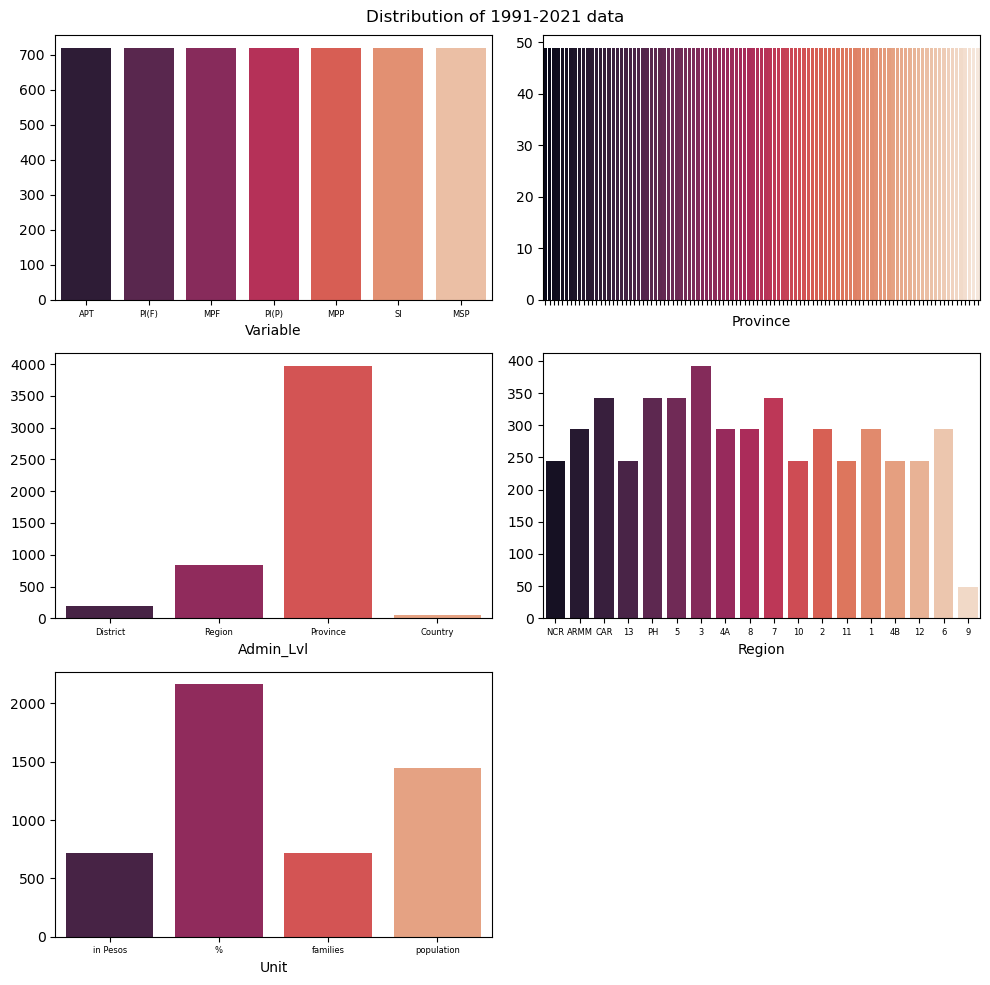

In [60]:
# Plot distribution of 1991-2021 data

# Get list of other columns to iterate over
cols = list(df_until_2021.columns)
cols.remove('Value')
cols.remove('Year')

# PLot distribution
plt.figure(figsize = (10, 10))
plt.suptitle("Distribution of 1991-2021 data")

# Abbreviations for x tick labels
xticklabels = [vars_labels, prov_labels, admin_labels, region_labels, unit_labels]

for i in range(len(cols)):
    ax = plt.subplot(3, 2, i+1)
    sns.countplot(data=df_until_2021, x=cols[i], palette='rocket')
    ax.set_ylabel('')
    ax.set_xticklabels(xticklabels[i], fontsize=6)

plt.tight_layout()
plt.show()

### Download data for analysis in Tableau
For next steps, Tableau was chosen for data visualization as it allows creating interactive dashboards for the user to interact with the data. Thus, the dataframe is downloaded for next steps in Tableau.

In [61]:
# Download data
df_until_2021.to_csv('povstat_until_2021.csv')

### Inspect ```Magnitude of Poor Population``` as a share of the national population in selected regions
In addition to the Tableau visualizations, ```Magnitude of Poor Population``` is examined to see if majority of the Philippine poor are concentrated in a select few regions, and what percentage of the Philippine poor is comprised of these regions.

In [62]:
# Get all data for Magnitude of Poor Population
poverty_magnitude = df_until_2021.query('Variable == "Magnitude of Poor Population"')
poverty_magnitude

,Variable,Year,Province,Value,Admin_Lvl,Region,Unit
20,Magnitude of Poor Population,1991,1st District,NaN,District,NCR,people
21,Magnitude of Poor Population,2006,1st District,79109.0,District,NCR,people
22,Magnitude of Poor Population,2009,1st District,84914.0,District,NCR,people
23,Magnitude of Poor Population,2012,1st District,102591.0,District,NCR,people
24,Magnitude of Poor Population,2015,1st District,82007.0,District,NCR,people
...,...,...,...,...,...,...,...
4965,Magnitude of Poor Population,2021,Basilan,211623.0,Province,ARMM,people
4966,Magnitude of Poor Population,2021,Lanao del Sur,127238.0,Province,ARMM,people
4967,Magnitude of Poor Population,2021,Maguindanao,514991.0,Province,ARMM,people
4968,Magnitude of Poor Population,2021,Sulu,583150.0,Province,ARMM,people


In [63]:
# Separate data by administration level
natl_poverty_magnitude = poverty_magnitude.query('Admin_Lvl == "Country"')
prov_poverty_magnitude = poverty_magnitude.query('Admin_Lvl == "District" or Admin_Lvl == "Province"')
reg_poverty_magnitude = poverty_magnitude.query('Admin_Lvl == "Region"')

In [64]:
# Get Magnitude of Poor Population per region as a share of the national population
def get_share_of_natl_poor(row):
    year = row['Year']
    natl_poor = natl_poverty_magnitude.query('Year == @year')['Value'].values[0]
    share_of_natl_poor = row['Value'] / natl_poor
    return share_of_natl_poor

prov_poverty_magnitude['Share of Natl Poor'] = prov_poverty_magnitude.apply(get_share_of_natl_poor, axis=1)
prov_poverty_magnitude

C:\Users\Irish\AppData\Local\Temp\ipykernel_10912\2496720517.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prov_poverty_magnitude['Share of Natl Poor'] = prov_poverty_magnitude.apply(get_share_of_natl_poor, axis=1)


,Variable,Year,Province,Value,Admin_Lvl,Region,Unit,Share of Natl Poor
20,Magnitude of Poor Population,1991,1st District,NaN,District,NCR,people,NaN
21,Magnitude of Poor Population,2006,1st District,79109.0,District,NCR,people,0.003494
22,Magnitude of Poor Population,2009,1st District,84914.0,District,NCR,people,0.003644
23,Magnitude of Poor Population,2012,1st District,102591.0,District,NCR,people,0.004320
24,Magnitude of Poor Population,2015,1st District,82007.0,District,NCR,people,0.003740
...,...,...,...,...,...,...,...,...
4965,Magnitude of Poor Population,2021,Basilan,211623.0,Province,ARMM,people,0.010585
4966,Magnitude of Poor Population,2021,Lanao del Sur,127238.0,Province,ARMM,people,0.006364
4967,Magnitude of Poor Population,2021,Maguindanao,514991.0,Province,ARMM,people,0.025760
4968,Magnitude of Poor Population,2021,Sulu,583150.0,Province,ARMM,people,0.029169


In [65]:
# Inspect provinces with highest magnitude of poor population
province_cnt = 10

# Inspect handpicked regions
select_regions = ['Cebu', 'Negros Occidental', 'Negros Oriental', 'Iloilo', 'Guimaras', 'Siquijor', 'Bohol', 'Leyte', 'Southern Leyte','Zamboanga del Norte', 'Zamboanga Sibugay', 'Zamboanga del Sur', 'Misamis Occidental', 'Lanao del Norte', 'Misamis Oriental', 'Lanao del Sur', 'Bukidnon', 'North Cotabato']
len(select_regions)

18

In [66]:
# Inspect X provinces with highest magnitude of poor population
ranked = prov_poverty_magnitude.query('Year == 2006').groupby("Province").sum().sort_values('Value', ascending=False)
print(ranked[:province_cnt])
print()
print(ranked[:province_cnt].sum())

                     Year      Value  Share of Natl Poor
Province                                                
Cebu                 2006  1184478.0            0.052309
Camarines Sur        2006   815084.0            0.035996
Negros Occidental    2006   776097.0            0.034274
Pangasinan           2006   768315.0            0.033930
Leyte                2006   671771.0            0.029667
Zamboanga del Norte  2006   597173.0            0.026372
Quezon               2006   585684.0            0.025865
Bohol                2006   544187.0            0.024032
Bukidnon             2006   531119.0            0.023455
Negros Oriental      2006   526025.0            0.023230

Year                  2.006000e+04
Value                 6.999933e+06
Share of Natl Poor    3.091300e-01
dtype: float64


In [67]:
# Inspect handpicked regions
print(ranked[ranked.index.isin(select_regions)])
print()
print(ranked[ranked.index.isin(select_regions)].sum())

                     Year      Value  Share of Natl Poor
Province                                                
Cebu                 2006  1184478.0            0.052309
Negros Occidental    2006   776097.0            0.034274
Leyte                2006   671771.0            0.029667
Zamboanga del Norte  2006   597173.0            0.026372
Bohol                2006   544187.0            0.024032
Bukidnon             2006   531119.0            0.023455
Negros Oriental      2006   526025.0            0.023230
Zamboanga del Sur    2006   515055.0            0.022746
Iloilo               2006   453617.0            0.020033
Misamis Oriental     2006   422063.0            0.018639
Lanao del Sur        2006   367996.0            0.016251
Lanao del Norte      2006   335571.0            0.014819
North Cotabato       2006   331158.0            0.014625
Zamboanga Sibugay    2006   279278.0            0.012333
Misamis Occidental   2006   233664.0            0.010319
Southern Leyte       2006   123

In [68]:
# Inspect X provinces with highest magnitude of poor population
ranked = prov_poverty_magnitude.query('Year == 2009').groupby("Province").sum().sort_values('Value', ascending=False)
print(ranked[:province_cnt])
print()
print(ranked[:province_cnt].sum())

                     Year      Value  Share of Natl Poor
Province                                                
Cebu                 2009  1108152.0            0.047559
Negros Occidental    2009   884100.0            0.037943
Camarines Sur        2009   855074.0            0.036698
Zamboanga del Norte  2009   650867.0            0.027934
Leyte                2009   628371.0            0.026968
Pangasinan           2009   600931.0            0.025791
Bukidnon             2009   579992.0            0.024892
Davao del Sur        2009   569381.0            0.024436
Iloilo               2009   563572.0            0.024187
Nueva Ecija          2009   560167.0            0.024041

Year                  2.009000e+04
Value                 7.000607e+06
Share of Natl Poor    3.004495e-01
dtype: float64


In [69]:
# Inspect handpicked regions
print(ranked[ranked.index.isin(select_regions)])
print()
print(ranked[ranked.index.isin(select_regions)].sum())

                     Year      Value  Share of Natl Poor
Province                                                
Cebu                 2009  1108152.0            0.047559
Negros Occidental    2009   884100.0            0.037943
Zamboanga del Norte  2009   650867.0            0.027934
Leyte                2009   628371.0            0.026968
Bukidnon             2009   579992.0            0.024892
Iloilo               2009   563572.0            0.024187
Zamboanga del Sur    2009   532271.0            0.022844
Bohol                2009   512094.0            0.021978
Lanao del Sur        2009   501993.0            0.021544
Lanao del Norte      2009   411901.0            0.017678
Negros Oriental      2009   397815.0            0.017073
Misamis Oriental     2009   392663.0            0.016852
North Cotabato       2009   361554.0            0.015517
Zamboanga Sibugay    2009   301718.0            0.012949
Misamis Occidental   2009   255470.0            0.010964
Southern Leyte       2009   164

In [70]:
# Inspect X provinces with highest magnitude of poor population
ranked = prov_poverty_magnitude.query('Year == 2012').groupby("Province").sum().sort_values('Value', ascending=False)
print(ranked[:province_cnt])
print()
print(ranked[:province_cnt].sum())

                   Year      Value  Share of Natl Poor
Province                                              
Cebu               2012  1000163.0            0.042119
Negros Occidental  2012   961694.0            0.040499
Camarines Sur      2012   771984.0            0.032510
Leyte              2012   713063.0            0.030029
North Cotabato     2012   708062.0            0.029818
Lanao del Sur      2012   687138.0            0.028937
Bukidnon           2012   664158.0            0.027969
Negros Oriental    2012   638466.0            0.026887
Zamboanga del Sur  2012   587598.0            0.024745
Pangasinan         2012   582209.0            0.024518

Year                  2.012000e+04
Value                 7.314535e+06
Share of Natl Poor    3.080337e-01
dtype: float64


In [71]:
# Inspect handpicked regions
print(ranked[ranked.index.isin(select_regions)])
print()
print(ranked[ranked.index.isin(select_regions)].sum())

                     Year      Value  Share of Natl Poor
Province                                                
Cebu                 2012  1000163.0            0.042119
Negros Occidental    2012   961694.0            0.040499
Leyte                2012   713063.0            0.030029
North Cotabato       2012   708062.0            0.029818
Lanao del Sur        2012   687138.0            0.028937
Bukidnon             2012   664158.0            0.027969
Negros Oriental      2012   638466.0            0.026887
Zamboanga del Sur    2012   587598.0            0.024745
Iloilo               2012   580937.0            0.024465
Zamboanga del Norte  2012   518347.0            0.021829
Lanao del Norte      2012   443271.0            0.018667
Bohol                2012   429000.0            0.018066
Misamis Oriental     2012   361628.0            0.015229
Zamboanga Sibugay    2012   282355.0            0.011891
Misamis Occidental   2012   241738.0            0.010180
Southern Leyte       2012   174

In [72]:
# Inspect X provinces with highest magnitude of poor population
ranked = prov_poverty_magnitude.query('Year == 2015').groupby("Province").sum().sort_values('Value', ascending=False)
print(ranked[:province_cnt])
print()
print(ranked[:province_cnt].sum())

                     Year     Value  Share of Natl Poor
Province                                               
Cebu                 2015  986557.0            0.044993
Negros Occidental    2015  867141.0            0.039547
Bukidnon             2015  732027.0            0.033385
Lanao del Sur        2015  725262.0            0.033076
Negros Oriental      2015  694293.0            0.031664
Camarines Sur        2015  665165.0            0.030335
Leyte                2015  652690.0            0.029766
North Cotabato       2015  615923.0            0.028090
Zamboanga del Norte  2015  588451.0            0.026837
Sulu                 2015  577987.0            0.026360

Year                  2.015000e+04
Value                 7.105496e+06
Share of Natl Poor    3.240522e-01
dtype: float64


In [73]:
# Inspect handpicked regions
print(ranked[ranked.index.isin(select_regions)])
print()
print(ranked[ranked.index.isin(select_regions)].sum())

                     Year     Value  Share of Natl Poor
Province                                               
Cebu                 2015  986557.0            0.044993
Negros Occidental    2015  867141.0            0.039547
Bukidnon             2015  732027.0            0.033385
Lanao del Sur        2015  725262.0            0.033076
Negros Oriental      2015  694293.0            0.031664
Leyte                2015  652690.0            0.029766
North Cotabato       2015  615923.0            0.028090
Zamboanga del Norte  2015  588451.0            0.026837
Iloilo               2015  540001.0            0.024627
Zamboanga del Sur    2015  476765.0            0.021743
Lanao del Norte      2015  415967.0            0.018971
Misamis Oriental     2015  338972.0            0.015459
Bohol                2015  298196.0            0.013599
Misamis Occidental   2015  197324.0            0.008999
Zamboanga Sibugay    2015  164230.0            0.007490
Southern Leyte       2015  146726.0            0

In [74]:
# Inspect X provinces with highest magnitude of poor population
ranked = prov_poverty_magnitude.query('Year == 2018').groupby("Province").sum().sort_values('Value', ascending=False)
print(ranked[:province_cnt])
print()
print(ranked[:province_cnt].sum())

                     Year     Value  Share of Natl Poor
Province                                               
Lanao del Sur        2018  785619.0            0.044460
Cebu                 2018  725415.0            0.041053
Sulu                 2018  722704.0            0.040900
Maguindanao          2018  611488.0            0.034606
Negros Occidental    2018  606739.0            0.034337
Leyte                2018  580948.0            0.032877
Camarines Sur        2018  573621.0            0.032463
Zamboanga del Norte  2018  469707.0            0.026582
Zamboanga del Sur    2018  451587.0            0.025556
North Cotabato       2018  430288.0            0.024351

Year                  2.018000e+04
Value                 5.958116e+06
Share of Natl Poor    3.371843e-01
dtype: float64


In [75]:
# Inspect handpicked regions
print(ranked[ranked.index.isin(select_regions)])
print()
print(ranked[ranked.index.isin(select_regions)].sum())

                     Year     Value  Share of Natl Poor
Province                                               
Lanao del Sur        2018  785619.0            0.044460
Cebu                 2018  725415.0            0.041053
Negros Occidental    2018  606739.0            0.034337
Leyte                2018  580948.0            0.032877
Zamboanga del Norte  2018  469707.0            0.026582
Zamboanga del Sur    2018  451587.0            0.025556
North Cotabato       2018  430288.0            0.024351
Iloilo               2018  407513.0            0.023062
Bukidnon             2018  406256.0            0.022991
Negros Oriental      2018  354301.0            0.020051
Bohol                2018  280590.0            0.015879
Lanao del Norte      2018  275183.0            0.015573
Misamis Oriental     2018  260124.0            0.014721
Zamboanga Sibugay    2018  234221.0            0.013255
Misamis Occidental   2018  165548.0            0.009369
Southern Leyte       2018  103085.0            0

In [76]:
# Inspect X provinces with highest magnitude of poor population
ranked = prov_poverty_magnitude.query('Year == 2021').groupby("Province").sum().sort_values('Value', ascending=False)
print(ranked[:province_cnt])
print()
print(ranked[:province_cnt].sum())

                     Year      Value  Share of Natl Poor
Province                                                
Cebu                 2021  1476703.0            0.073864
Camarines Sur        2021   804317.0            0.040231
Negros Occidental    2021   696577.0            0.034842
Leyte                2021   594918.0            0.029757
Sulu                 2021   583150.0            0.029169
Pangasinan           2021   561479.0            0.028085
Zamboanga del Norte  2021   534740.0            0.026747
Maguindanao          2021   514991.0            0.025760
North Cotabato       2021   494020.0            0.024711
Quezon               2021   492996.0            0.024659

Year                  2.021000e+04
Value                 6.753891e+06
Share of Natl Poor    3.378255e-01
dtype: float64


In [77]:
# Inspect handpicked regions
print(ranked[ranked.index.isin(select_regions)])
print()
print(ranked[ranked.index.isin(select_regions)].sum())

                     Year      Value  Share of Natl Poor
Province                                                
Cebu                 2021  1476703.0            0.073864
Negros Occidental    2021   696577.0            0.034842
Leyte                2021   594918.0            0.029757
Zamboanga del Norte  2021   534740.0            0.026747
North Cotabato       2021   494020.0            0.024711
Iloilo               2021   454813.0            0.022749
Bukidnon             2021   446123.0            0.022315
Negros Oriental      2021   414043.0            0.020710
Lanao del Norte      2021   380712.0            0.019043
Zamboanga del Sur    2021   354140.0            0.017714
Bohol                2021   327054.0            0.016359
Misamis Oriental     2021   321152.0            0.016064
Zamboanga Sibugay    2021   233645.0            0.011687
Misamis Occidental   2021   155900.0            0.007798
Lanao del Sur        2021   127238.0            0.006364
Southern Leyte       2021    96

Interestingly, the 18 selected regions total to over 35% of the national poor every year. These 18 regions were selected for their proximity and high scores in magnitude of poor population with the aim of answering "Which nearby provinces have the highest combined magnitude of poor?", or put another way, "Where is poverty concentrated?"

### ```Change in poverty incidence in 1991 vs 2021```
It would also be helpful to visualize which provinces and regions had the most drastic changes in poverty incidence. This variable was computed as below.

In [78]:
# Query 1991 and 2021 data
poverty_incidence_1991 = df_until_2021.query('Year == 1991 and Variable == "Poverty Incidence among Population (%)" and Admin_Lvl == "Region"').reset_index(drop=True)
poverty_incidence_2021 = df_until_2021.query('Year == 2021 and Variable == "Poverty Incidence among Population (%)" and Admin_Lvl == "Region"').reset_index(drop=True)

In [79]:
poverty_incidence_1991.index = poverty_incidence_1991['Province']
poverty_incidence_1991

,Variable,Year,Province,Value,Admin_Lvl,Region,Unit
Province,,,,,,,
ARMM,Poverty Incidence among Population (%),1991,ARMM,30.5,Region,ARMM,%
CAR,Poverty Incidence among Population (%),1991,CAR,42.7,Region,CAR,%
Region XIII,Poverty Incidence among Population (%),1991,Region XIII,54.3,Region,Region XIII,%
NCR,Poverty Incidence among Population (%),1991,NCR,7.1,Region,NCR,%
Region I,Poverty Incidence among Population (%),1991,Region I,36.6,Region,Region I,%
Region II,Poverty Incidence among Population (%),1991,Region II,42.8,Region,Region II,%
Region III,Poverty Incidence among Population (%),1991,Region III,21.1,Region,Region III,%
Region IV-A,Poverty Incidence among Population (%),1991,Region IV-A,22.7,Region,Region IV-A,%
Region IV-B,Poverty Incidence among Population (%),1991,Region IV-B,44.4,Region,Region IV-B,%


In [80]:
poverty_incidence_2021.index = poverty_incidence_2021['Province']
poverty_incidence_2021

,Variable,Year,Province,Value,Admin_Lvl,Region,Unit
Province,,,,,,,
NCR,Poverty Incidence among Population (%),2021,NCR,3.5,Region,NCR,%
CAR,Poverty Incidence among Population (%),2021,CAR,9.9,Region,CAR,%
Region I,Poverty Incidence among Population (%),2021,Region I,14.4,Region,Region I,%
Region II,Poverty Incidence among Population (%),2021,Region II,15.4,Region,Region II,%
Region III,Poverty Incidence among Population (%),2021,Region III,11.4,Region,Region III,%
Region IV-A,Poverty Incidence among Population (%),2021,Region IV-A,10.2,Region,Region IV-A,%
Region IV-B,Poverty Incidence among Population (%),2021,Region IV-B,20.8,Region,Region IV-B,%
Region V,Poverty Incidence among Population (%),2021,Region V,29.3,Region,Region V,%
Region VI,Poverty Incidence among Population (%),2021,Region VI,19.0,Region,Region VI,%


In [81]:
# Compute poverty incidence change
poverty_incidence_change = poverty_incidence_1991.copy()
poverty_incidence_change['Variable'] = "Change in poverty incidence in 1991 vs 2021 (%)"

poverty_incidence_change.drop('Year', axis=1, inplace=True)
poverty_incidence_change['Value'] = poverty_incidence_2021['Value'] - poverty_incidence_1991['Value']

In [82]:
# Reformat dataframe for poverty incidence change
poverty_incidence_change = poverty_incidence_change.sort_values('Value')
poverty_incidence_change['1991 Poverty Incidence'] = poverty_incidence_1991['Value']
poverty_incidence_change['2021 Poverty Incidence'] = poverty_incidence_2021['Value']

poverty_incidence_change = poverty_incidence_change.reset_index(drop=True)
poverty_incidence_change.drop('Variable', axis=1, inplace=True)
poverty_incidence_change.rename(columns={"Value": "Change"}, inplace=True)

poverty_incidence_change

,Province,Change,Admin_Lvl,Region,Unit,1991 Poverty Incidence,2021 Poverty Incidence
0,CAR,-32.8,Region,CAR,%,42.7,9.9
1,Region II,-27.4,Region,Region II,%,42.8,15.4
2,Region V,-25.2,Region,Region V,%,54.5,29.3
3,Region XII,-25.2,Region,Region XII,%,53.3,28.1
4,Region IV-B,-23.6,Region,Region IV-B,%,44.4,20.8
5,Region XI,-22.8,Region,Region XI,%,39.6,16.8
6,Region I,-22.2,Region,Region I,%,36.6,14.4
7,Region VIII,-21.1,Region,Region VIII,%,50.0,28.9
8,Region XIII,-21.1,Region,Region XIII,%,54.3,33.2
9,Region VI,-20.6,Region,Region VI,%,39.6,19.0


All regions show a decrease in poverty incidence except for ARMM, where poverty incidence went up by a strong 23.2%.

In [83]:
# Download data
poverty_incidence_change.to_csv('pov_incidence_change.csv')

### Forecasting 2024 & 2027 data
With the newly added data from 2018 and 2021, we now have more data to forecast poverty statistics for years 2024 and 2027. 2024 and 2027 are chosen as the data follows a series of three years between each data point. 

One caveat to this is that the forecasts may not be very accurate as 2021 happened during the COVID-19 pandemic, during which poverty became more prevalent. Thus, 2021 may slightly skew the data. In addition, models perform best on many data points. This dataset only includes four years/data points, excluding 1991, which is not optimal for models to learn sufficiently. Overall, however, the forecast should give us at least some general idea of developments in poverty for the coming years.

For this forecast, Autoregressive Integrated Moving Average (ARIMA) will be used to predict the values of future years. ARIMA was chosen as it is a simple time forecasting model fit for data with some non-stationarity, which matches the dataset as all variables show some trend of incline or decline over time.

In [84]:
import pmdarima as pm
import warnings
from sklearn.metrics import mean_squared_error
from pmdarima.metrics import smape
from pmdarima.pipeline import Pipeline
from pmdarima.preprocessing import BoxCoxEndogTransformer

In [92]:
# Cast year to a DateTime index for computation
forecast_copy = df_until_2021.copy().reset_index(drop=True)
forecast_copy.index = pd.to_datetime(df_until_2021.Year, format='%Y')

# Create dataframe with forecast data
df_until_2027 = df_until_2021.copy().reset_index(drop=True)

# Drop rows with 1991 data to enforce consistent frequency of 3 years between data points
forecast_copy.drop(forecast_copy.query('Year == 1991').index, axis=0, inplace=True)

# Replace missing values with 0 to avoid errors in computation
forecast_copy['Value'].fillna(0, inplace=True)

In [122]:
# Get provinces and variables to iterate over
provinces = forecast_copy['Province'].unique().tolist()
variables = forecast_copy['Variable'].unique().tolist()

# Iterate over generating predictions per variable, per province
for var in variables:
    forecast_var = forecast_copy.query('Variable == @var')
    
    for prov in provinces:
        # Create dataframe for data per place/province
        forecast_var_prov = forecast_var.query('Province == @prov')
        forecast_var_prov.index.freq = pd.infer_freq(forecast_var_prov.index)
        
        # Create test and train datasets
        train = forecast_var_prov[forecast_var_prov.index <= pd.to_datetime("2021-01-01")]
        test = forecast_var_prov[forecast_var_prov.index > pd.to_datetime("2015-01-01")]
        
        # After trying different years for test_train_cutoff, the model performed best when all years were used for training data
        # This is likely due to the very low number of data points (6 unique years).
        # Hence, test data (2018 & 2021) mainly serve to evaluate the model's performance, but are also used in training
        
        # Define model pipeline
        pipeline = Pipeline([
            ('boxcox', BoxCoxEndogTransformer(lmbda2=1e-3, neg_action="warn")),  # avoids negative values
            ('arima', pm.AutoARIMA(error_action="ignore"))
        ])
        
        # Fit model
        pipeline.fit(train['Value'])
        
        # Get model predictions for 2018, 2021, 2024, & 2027
        y_pred = pipeline.predict(4)
        
        # Evaluate model performance on years 2018 & 2021
        metrics_rmse = np.sqrt(mean_squared_error(test['Value'], y_pred[:2]))
        metrics_smape = smape(test['Value'], y_pred[:2])
        print(f"Generating forecasts for {var}, {prov}")
        
        # Add 2024 & 2027 predictions to dataframe with forecast data
        region = forecast_var_prov.iloc[0].at["Region"]
        admin_lvl = forecast_var_prov.iloc[0].at["Admin_Lvl"]
        unit = forecast_var_prov.iloc[0].at["Unit"]
        
        new_rows = [{'Variable': var, 
                     'Year': 2024, 
                     'Province': prov,
                     'Value': y_pred[2],
                     'Admin_Lvl': admin_lvl,
                     'Region': region,
                     'Unit': unit
                    }, 
                    {'Variable': var, 
                     'Year': 2027, 
                     'Province': prov,
                     'Value': y_pred[3],
                     'Admin_Lvl': admin_lvl,
                     'Region': region,
                     'Unit': unit
                    }]

        df_until_2027 = df_until_2027.append(new_rows, ignore_index=True)
        warnings.simplefilter(action='ignore', category=FutureWarning)

Generating forecasts for Annual Per Capita Poverty Threshold (in Pesos), 1st District
Generating forecasts for Annual Per Capita Poverty Threshold (in Pesos), 2nd District
Generating forecasts for Annual Per Capita Poverty Threshold (in Pesos), 3rd District
Generating forecasts for Annual Per Capita Poverty Threshold (in Pesos), 4th District
Generating forecasts for Annual Per Capita Poverty Threshold (in Pesos), ARMM
Generating forecasts for Annual Per Capita Poverty Threshold (in Pesos), Abra
Generating forecasts for Annual Per Capita Poverty Threshold (in Pesos), Agusan del Norte
Generating forecasts for Annual Per Capita Poverty Threshold (in Pesos), Agusan del Sur
Generating forecasts for Annual Per Capita Poverty Threshold (in Pesos), Aklan
Generating forecasts for Annual Per Capita Poverty Threshold (in Pesos), Albay
Generating forecasts for Annual Per Capita Poverty Threshold (in Pesos), Antique
Generating forecasts for Annual Per Capita Poverty Threshold (in Pesos), Apayao
Gen

Generating forecasts for Annual Per Capita Poverty Threshold (in Pesos), Western Samar
Generating forecasts for Annual Per Capita Poverty Threshold (in Pesos), Zambales
Generating forecasts for Annual Per Capita Poverty Threshold (in Pesos), Zamboanga Sibugay
Generating forecasts for Annual Per Capita Poverty Threshold (in Pesos), Zamboanga del Norte
Generating forecasts for Annual Per Capita Poverty Threshold (in Pesos), Zamboanga del Sur
Generating forecasts for Poverty Incidence among Families (%), 1st District
Generating forecasts for Poverty Incidence among Families (%), 2nd District
Generating forecasts for Poverty Incidence among Families (%), 3rd District
Generating forecasts for Poverty Incidence among Families (%), 4th District
Generating forecasts for Poverty Incidence among Families (%), ARMM
Generating forecasts for Poverty Incidence among Families (%), Abra
Generating forecasts for Poverty Incidence among Families (%), Agusan del Norte
Generating forecasts for Poverty Inc

Generating forecasts for Magnitude of Poor Families, 3rd District
Generating forecasts for Magnitude of Poor Families, 4th District
Generating forecasts for Magnitude of Poor Families, ARMM
Generating forecasts for Magnitude of Poor Families, Abra
Generating forecasts for Magnitude of Poor Families, Agusan del Norte
Generating forecasts for Magnitude of Poor Families, Agusan del Sur


C:\Users\Irish\anaconda3\lib\site-packages\pmdarima\arima\auto.py:444: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


Generating forecasts for Magnitude of Poor Families, Aklan
Generating forecasts for Magnitude of Poor Families, Albay
Generating forecasts for Magnitude of Poor Families, Antique
Generating forecasts for Magnitude of Poor Families, Apayao
Generating forecasts for Magnitude of Poor Families, Aurora
Generating forecasts for Magnitude of Poor Families, Basilan
Generating forecasts for Magnitude of Poor Families, Bataan
Generating forecasts for Magnitude of Poor Families, Batanes
Generating forecasts for Magnitude of Poor Families, Batangas
Generating forecasts for Magnitude of Poor Families, Benguet
Generating forecasts for Magnitude of Poor Families, Biliran
Generating forecasts for Magnitude of Poor Families, Bohol
Generating forecasts for Magnitude of Poor Families, Bukidnon
Generating forecasts for Magnitude of Poor Families, Bulacan
Generating forecasts for Magnitude of Poor Families, CAR
Generating forecasts for Magnitude of Poor Families, Cagayan
Generating forecasts for Magnitude 

C:\Users\Irish\anaconda3\lib\site-packages\pmdarima\arima\auto.py:444: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


Generating forecasts for Magnitude of Poor Families, Marinduque
Generating forecasts for Magnitude of Poor Families, Masbate
Generating forecasts for Magnitude of Poor Families, Misamis Occidental
Generating forecasts for Magnitude of Poor Families, Misamis Oriental
Generating forecasts for Magnitude of Poor Families, Mt. Province
Generating forecasts for Magnitude of Poor Families, NCR
Generating forecasts for Magnitude of Poor Families, Negros Occidental
Generating forecasts for Magnitude of Poor Families, Negros Oriental
Generating forecasts for Magnitude of Poor Families, North Cotabato
Generating forecasts for Magnitude of Poor Families, Northern Samar
Generating forecasts for Magnitude of Poor Families, Nueva Ecija
Generating forecasts for Magnitude of Poor Families, Nueva Vizcaya
Generating forecasts for Magnitude of Poor Families, Occidental Mindoro
Generating forecasts for Magnitude of Poor Families, Oriental Mindoro
Generating forecasts for Magnitude of Poor Families, PHILIPP

C:\Users\Irish\anaconda3\lib\site-packages\pmdarima\arima\auto.py:444: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


Generating forecasts for Magnitude of Poor Families, Romblon
Generating forecasts for Magnitude of Poor Families, Sarangani
Generating forecasts for Magnitude of Poor Families, Siquijor
Generating forecasts for Magnitude of Poor Families, Sorsogon
Generating forecasts for Magnitude of Poor Families, South Cotabato
Generating forecasts for Magnitude of Poor Families, Southern Leyte
Generating forecasts for Magnitude of Poor Families, Sultan Kudarat
Generating forecasts for Magnitude of Poor Families, Sulu
Generating forecasts for Magnitude of Poor Families, Surigao Del Norte
Generating forecasts for Magnitude of Poor Families, Surigao Del Sur
Generating forecasts for Magnitude of Poor Families, Tarlac
Generating forecasts for Magnitude of Poor Families, Tawi-tawi
Generating forecasts for Magnitude of Poor Families, Western Samar
Generating forecasts for Magnitude of Poor Families, Zambales
Generating forecasts for Magnitude of Poor Families, Zamboanga Sibugay
Generating forecasts for Ma

Generating forecasts for Poverty Incidence among Population (%), Surigao Del Norte
Generating forecasts for Poverty Incidence among Population (%), Surigao Del Sur
Generating forecasts for Poverty Incidence among Population (%), Tarlac
Generating forecasts for Poverty Incidence among Population (%), Tawi-tawi
Generating forecasts for Poverty Incidence among Population (%), Western Samar
Generating forecasts for Poverty Incidence among Population (%), Zambales
Generating forecasts for Poverty Incidence among Population (%), Zamboanga Sibugay
Generating forecasts for Poverty Incidence among Population (%), Zamboanga del Norte
Generating forecasts for Poverty Incidence among Population (%), Zamboanga del Sur
Generating forecasts for Magnitude of Poor Population, 1st District
Generating forecasts for Magnitude of Poor Population, 2nd District
Generating forecasts for Magnitude of Poor Population, 3rd District
Generating forecasts for Magnitude of Poor Population, 4th District
Generating fo

C:\Users\Irish\anaconda3\lib\site-packages\pmdarima\arima\auto.py:444: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


Generating forecasts for Magnitude of Poor Population, Rizal
Generating forecasts for Magnitude of Poor Population, Romblon
Generating forecasts for Magnitude of Poor Population, Sarangani


C:\Users\Irish\anaconda3\lib\site-packages\pmdarima\arima\auto.py:444: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


Generating forecasts for Magnitude of Poor Population, Siquijor
Generating forecasts for Magnitude of Poor Population, Sorsogon
Generating forecasts for Magnitude of Poor Population, South Cotabato
Generating forecasts for Magnitude of Poor Population, Southern Leyte
Generating forecasts for Magnitude of Poor Population, Sultan Kudarat
Generating forecasts for Magnitude of Poor Population, Sulu
Generating forecasts for Magnitude of Poor Population, Surigao Del Norte
Generating forecasts for Magnitude of Poor Population, Surigao Del Sur
Generating forecasts for Magnitude of Poor Population, Tarlac
Generating forecasts for Magnitude of Poor Population, Tawi-tawi
Generating forecasts for Magnitude of Poor Population, Western Samar
Generating forecasts for Magnitude of Poor Population, Zambales
Generating forecasts for Magnitude of Poor Population, Zamboanga Sibugay
Generating forecasts for Magnitude of Poor Population, Zamboanga del Norte
Generating forecasts for Magnitude of Poor Populat

Generating forecasts for Subsistence Incidence among Population (%), Sultan Kudarat
Generating forecasts for Subsistence Incidence among Population (%), Sulu
Generating forecasts for Subsistence Incidence among Population (%), Surigao Del Norte
Generating forecasts for Subsistence Incidence among Population (%), Surigao Del Sur
Generating forecasts for Subsistence Incidence among Population (%), Tarlac
Generating forecasts for Subsistence Incidence among Population (%), Tawi-tawi
Generating forecasts for Subsistence Incidence among Population (%), Western Samar
Generating forecasts for Subsistence Incidence among Population (%), Zambales
Generating forecasts for Subsistence Incidence among Population (%), Zamboanga Sibugay
Generating forecasts for Subsistence Incidence among Population (%), Zamboanga del Norte
Generating forecasts for Subsistence Incidence among Population (%), Zamboanga del Sur
Generating forecasts for Magnitude of Subsistence Poor Population, 1st District
Generating 

C:\Users\Irish\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


Generating forecasts for Magnitude of Subsistence Poor Population, ARMM
Generating forecasts for Magnitude of Subsistence Poor Population, Abra
Generating forecasts for Magnitude of Subsistence Poor Population, Agusan del Norte
Generating forecasts for Magnitude of Subsistence Poor Population, Agusan del Sur
Generating forecasts for Magnitude of Subsistence Poor Population, Aklan
Generating forecasts for Magnitude of Subsistence Poor Population, Albay
Generating forecasts for Magnitude of Subsistence Poor Population, Antique
Generating forecasts for Magnitude of Subsistence Poor Population, Apayao
Generating forecasts for Magnitude of Subsistence Poor Population, Aurora
Generating forecasts for Magnitude of Subsistence Poor Population, Basilan
Generating forecasts for Magnitude of Subsistence Poor Population, Bataan
Generating forecasts for Magnitude of Subsistence Poor Population, Batanes
Generating forecasts for Magnitude of Subsistence Poor Population, Batangas
Generating forecasts 

In [123]:
# Download data
df_until_2027.to_csv('povstat_until_2027.csv')
df_until_2027

,Variable,Year,Province,Value,Admin_Lvl,Region,Unit
0,Annual Per Capita Poverty Threshold (in Pesos),1991,1st District,NaN,District,NCR,PHP
1,Annual Per Capita Poverty Threshold (in Pesos),2006,1st District,15699.000000,District,NCR,PHP
2,Annual Per Capita Poverty Threshold (in Pesos),2009,1st District,19227.000000,District,NCR,PHP
3,Annual Per Capita Poverty Threshold (in Pesos),2012,1st District,20344.000000,District,NCR,PHP
4,Annual Per Capita Poverty Threshold (in Pesos),2015,1st District,25007.000000,District,NCR,PHP
...,...,...,...,...,...,...,...
14648,Magnitude of Subsistence Poor Population,2027,Zamboanga Sibugay,98585.023881,Province,Region IX,people
14649,Magnitude of Subsistence Poor Population,2024,Zamboanga del Norte,319985.705428,Province,Region IX,people
14650,Magnitude of Subsistence Poor Population,2027,Zamboanga del Norte,325740.510800,Province,Region IX,people
14651,Magnitude of Subsistence Poor Population,2024,Zamboanga del Sur,157459.556518,Province,Region IX,people
